# Project: Depression dataset

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



## Import and cleaning

In [129]:
df = pd.read_csv('depression_data.csv')
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [131]:
df.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [132]:
display(df.describe())

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [133]:
# print a count of each data category if they are categorical
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col])==False:
        print(df[col].value_counts())
        print("\n")

Name
Michael Smith      198
Michael Johnson    147
David Smith        131
Robert Smith       128
David Johnson      126
                  ... 
Corey Moore          1
Carl Ballard         1
Carla Mcgrath        1
Cory Wise            1
Gary Faulkner        1
Name: count, Length: 196851, dtype: int64


Marital Status
Married     240444
Single       72110
Widowed      68485
Divorced     32729
Name: count, dtype: int64


Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64


Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64


Physical Activity Level
Sedentary    176850
Moderate     158013
Active        78905
Name: count, dtype: int64


Employment Status
Employed      265659
Unemployed    148109
Name: count, dtype: int64


Alcohol Consumption
Moderate    173440
Low         139250
High        101078
Name: count,

In [134]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [135]:
# Get rid of variables that are not useful for the analysis
df = df.drop('Name', axis=1)
df.columns

Index(['Age', 'Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions'],
      dtype='object')

## Transformation of the data

### Modifications in have children

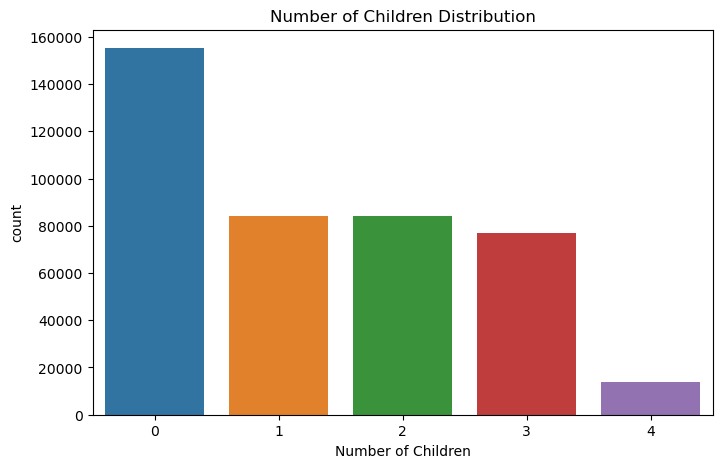

In [136]:
# Visualization of number of children
plt.figure(figsize=(8,5))
sns.countplot(x='Number of Children', data=df)
plt.title('Number of Children Distribution')
plt.show()

In [137]:
df['Has_children'] = (df['Number of Children'] > 0).astype(int)
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Has_children
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,1
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,1
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,1
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,1
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,0


c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


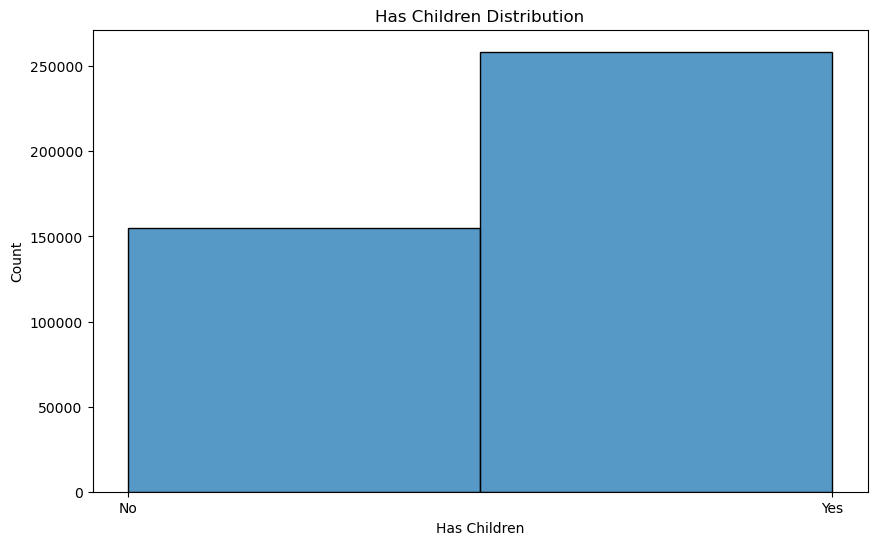

In [138]:
# Visualization of has children distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Has_children'], bins=2)
xlabels = ['No', 'Yes']
plt.xticks(ticks=[0,1], labels=xlabels)
plt.title('Has Children Distribution')
plt.xlabel('Has Children')
plt.ylabel('Count')
plt.show()

### Modifications in ages

c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


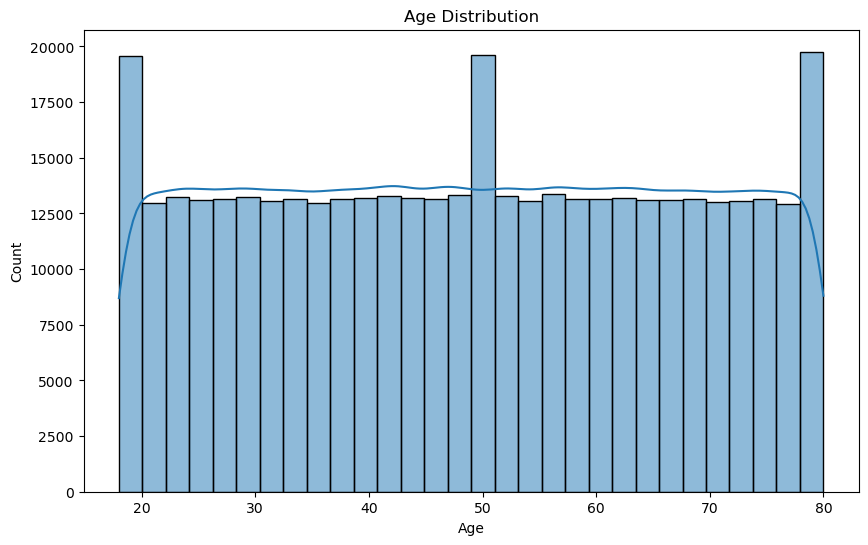

In [139]:
# Visualization of age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [140]:
# Grouping the data in age brackets
# Use of pd.cut to create age groups: https://pandas.pydata.org/docs/reference/api/pandas.cut.html
bins = [0, 12, 19, 35, 50, 65, 100]

df["Age_group"] = pd.cut(df["Age"], bins, labels=["Child", "Teen", "Young Adult", "Adult", "Middle Age", "Senior"])
df.head(-5)

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Has_children,Age_group
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,1,Young Adult
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,1,Middle Age
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,1,Senior
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,1,Middle Age
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,0,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413758,61,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,16867.23,Low,Moderate,Fair,No,Yes,Yes,No,1,Middle Age
413759,20,Single,Bachelor's Degree,0,Current,Sedentary,Employed,54483.50,Moderate,Unhealthy,Good,No,No,No,No,0,Young Adult
413760,46,Married,High School,1,Non-smoker,Sedentary,Employed,26153.32,Low,Unhealthy,Poor,Yes,No,No,Yes,1,Adult
413761,48,Married,Master's Degree,3,Non-smoker,Moderate,Employed,130842.60,Low,Healthy,Poor,No,No,No,Yes,1,Adult


c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


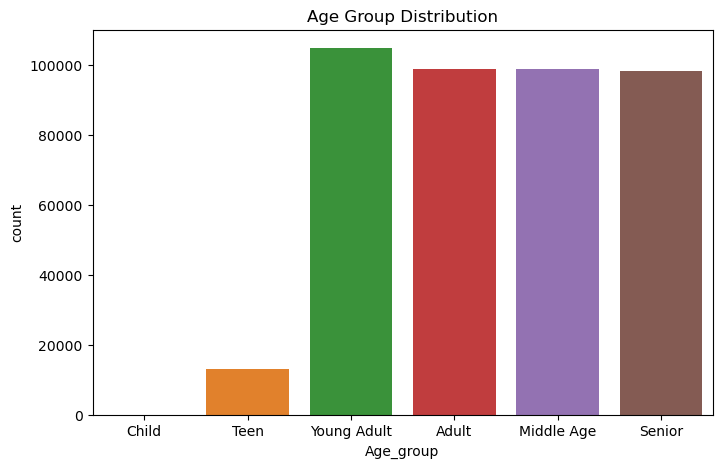

In [141]:
# Viusalization of age groups
plt.figure(figsize=(8,5))
sns.countplot(x='Age_group', data=df)
plt.title('Age Group Distribution')
plt.show()

### Modifications in income

c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


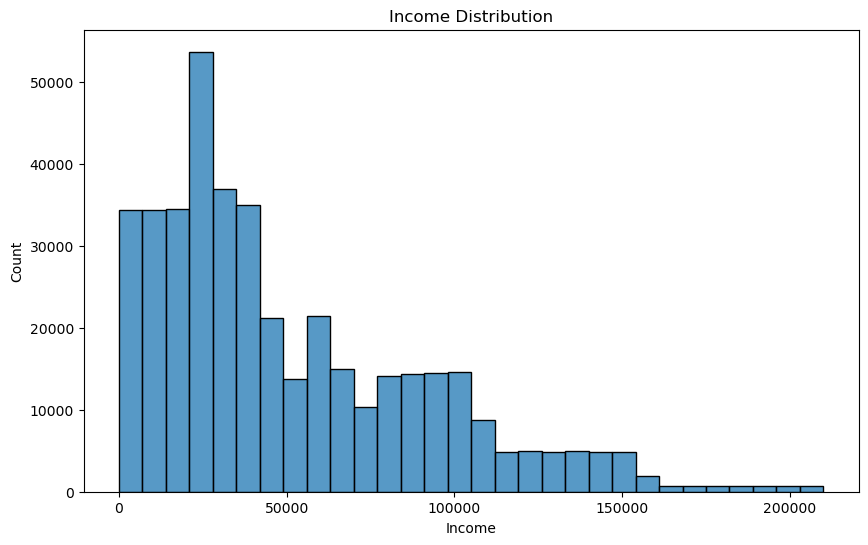

In [142]:
# Look distribution of income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30)
plt.title('Income Distribution')
plt.show()

In [143]:
# Print quantiles
quantiles = df['Income'].quantile([0.33, 0.66])
print(quantiles)

0.33    25530.0720
0.66    58938.0014
Name: Income, dtype: float64


In [144]:
# Separate income in quantiles
q1, q2 = df['Income'].quantile([0.33,0.66])
def income_level(income):
    if income < q1:
        return 'Low'
    elif income < q2:
        return 'Middle'
    else:
        return 'High'

df['Income_level'] = df['Income'].apply(income_level)
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Has_children,Age_group,Income_level
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,1,Young Adult,Middle
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,1,Middle Age,Middle
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,1,Senior,High
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,1,Middle Age,Low
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,0,Teen,Low


In [145]:
# Income log transformation to reduce skewness
df['Income_log'] = np.log1p(df['Income'])

c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


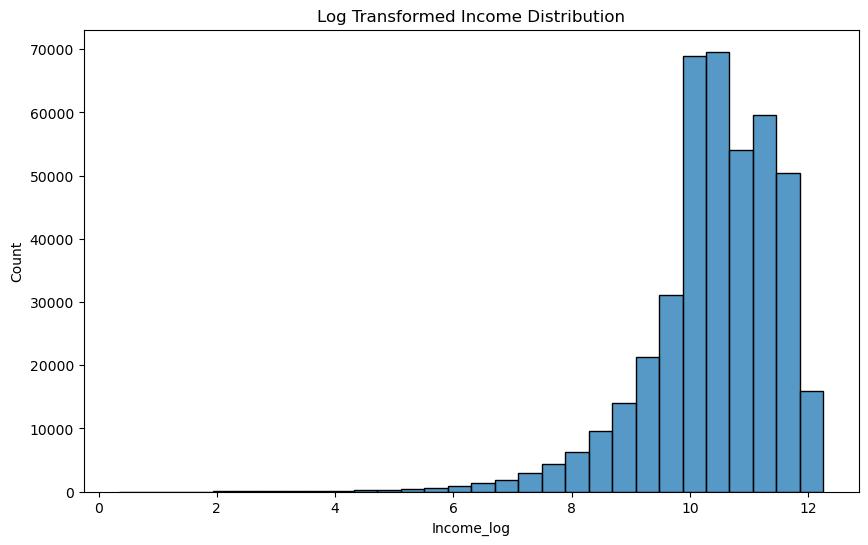

In [146]:
# Visualization of log transformed income
plt.figure(figsize=(10,6))
sns.histplot(df['Income_log'], bins=30)
plt.title('Log Transformed Income Distribution')
plt.show()

### Lifestyle scoring

In [147]:
# Function to calculate lifestyle score
def lifestyle_score(row):
    score = 0
    if row['Physical Activity Level'] == 'Active':
        score += 1
    if row['Physical Activity Level'] == 'Sedentary':
        score -= 1
    if row['Smoking Status'] == 'Non-Smoker':
        score += 1
    if row['Smoking Status'] == 'Former':
        score -= 1
    if row['Smoking Status'] == 'Current':
        score -= 1
    if row['Alcohol Consumption'] == 'Low':
        score += 1
    if row['Alcohol Consumption'] == 'High':
        score -= 1
    if row['Dietary Habits'] == 'Healthy':
        score += 1
    if row['Dietary Habits'] == 'Unhealthy':
        score -= 1
    if row['Sleep Patterns'] == 'Good':
        score += 1
    if row['Sleep Patterns'] == 'Poor':
        score -= 1
    return score

df['Lifestyle_Score'] = df.apply(lifestyle_score, axis=1)

In [148]:
def risk_score(row):
    score = 0

    if row['History of Mental Illness'] == 'Yes':
        score += 1
    if row['History of Substance Abuse'] == 'Yes':
        score += 1
    if row['Family History of Depression'] == 'Yes':
        score += 1
    if row['Chronic Medical Conditions'] == 'Yes':
        score += 1

    return score

df['Risk_Score'] = df.apply(risk_score, axis=1)

In [149]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,...,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Has_children,Age_group,Income_level,Income_log,Lifestyle_Score,Risk_Score
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,...,Yes,No,Yes,Yes,1,Young Adult,Middle,10.176056,1,3
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,...,Yes,No,No,Yes,1,Middle Age,Middle,10.662220,-3,2
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,...,No,No,Yes,No,1,Senior,High,11.738736,0,1
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,...,No,No,No,No,1,Middle Age,Low,9.209718,-1,0
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,...,Yes,No,Yes,Yes,0,Teen,Low,9.059062,0,3


c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


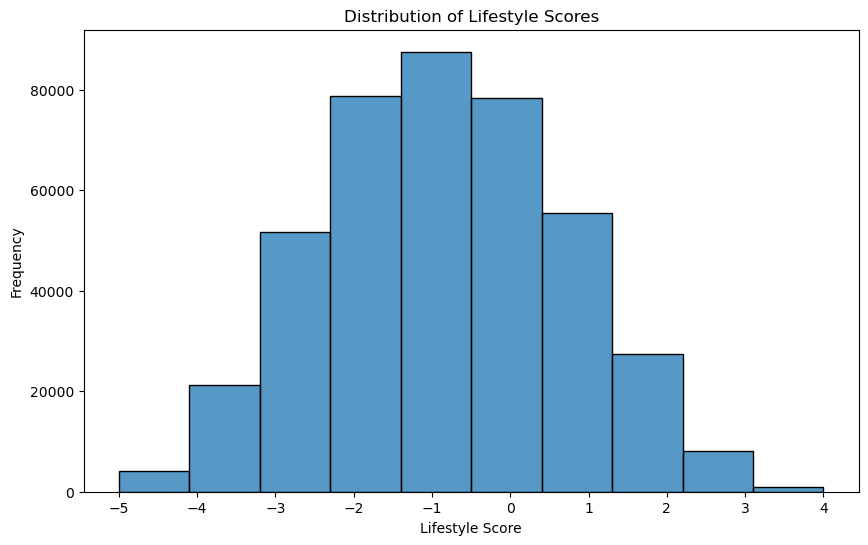

In [150]:
# Visualization of lifestyle score
plt.figure(figsize=(10,6))
sns.histplot(df['Lifestyle_Score'], bins=10)
plt.title('Distribution of Lifestyle Scores')
plt.xlabel('Lifestyle Score')
plt.ylabel('Frequency')
plt.xticks(sorted(df['Lifestyle_Score'].unique()))
plt.show()

c:\Users\roy_l\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


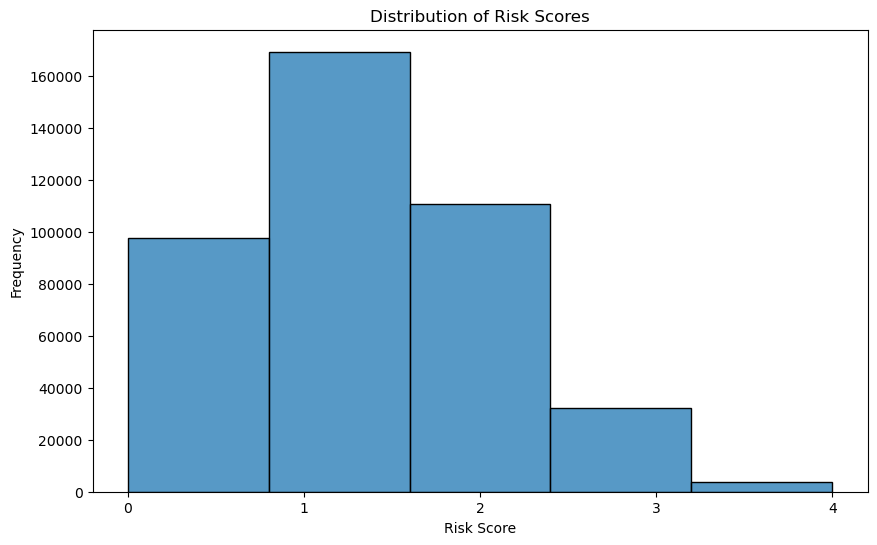

In [151]:
# Visualization of risk score
plt.figure(figsize=(10,6))
sns.histplot(df['Risk_Score'], bins=5)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.xticks(sorted(df['Risk_Score'].unique()))

plt.show()

## Engineering of the dataset

### Separation fo variables

In [152]:
# Numerical variables for clustering
numeric_cols = ['Age', 
    'Income_log', 
    'Lifestyle_Score', 
    'Risk_Score', 
    'Number of Children'
]

# Categorical variables for clustering
categorical_cols = [
    'Marital Status',
    'Employment Status',
    'Education Level',
    'Income_level',
    'Age_group',
    'Has_children'
]

# Copy dataframe for clustering
df_cluster = df[numeric_cols + categorical_cols].copy()
df_cluster.head()

,Age,Income_log,Lifestyle_Score,Risk_Score,Number of Children,Marital Status,Employment Status,Education Level,Income_level,Age_group,Has_children
0,31,10.176056,1,3,2,Married,Unemployed,Bachelor's Degree,Middle,Young Adult,1
1,55,10.662220,-3,2,1,Married,Employed,High School,Middle,Middle Age,1
2,78,11.738736,0,1,1,Widowed,Employed,Master's Degree,High,Senior,1
3,58,9.209718,-1,0,3,Divorced,Unemployed,Master's Degree,Low,Middle Age,1
4,18,9.059062,0,3,0,Single,Unemployed,High School,Low,Teen,0


### Standardization of numerical variables

In [153]:
x_numeric = df_cluster[numeric_cols]

# Standardize numerical variables
scaler = StandardScaler()
x_num = scaler.fit_transform(x_numeric)
x_num = pd.DataFrame(x_num, columns=numeric_cols, index=df_cluster.index)
x_num.head()

,Age,Income_log,Lifestyle_Score,Risk_Score,Number of Children
0,-0.991298,-0.213319,1.089879,1.939884,0.566692
1,0.330380,0.228157,-1.221566,0.853930,-0.241681
2,1.596988,1.205719,0.512018,-0.232023,-0.241681
3,0.495590,-1.090830,-0.065843,-1.317976,1.375065
4,-1.707206,-1.227638,0.512018,1.939884,-1.050054


### One-hot encoding (dummies)

In [154]:
x_categorical = df_cluster[categorical_cols]

x_cat = pd.get_dummies(x_categorical, drop_first=True)
x_cat.head()

,Has_children,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Employment Status_Unemployed,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Income_level_Low,Income_level_Middle,Age_group_Teen,Age_group_Young Adult,Age_group_Adult,Age_group_Middle Age,Age_group_Senior
0,1,True,False,False,True,True,False,False,False,False,True,False,True,False,False,False
1,1,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False
2,1,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True
3,1,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False
4,0,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False


In [155]:
# Gather final dataset for clustering
x_final = pd.concat([x_num, x_cat], axis=1)
x_final.head()

,Age,Income_log,Lifestyle_Score,Risk_Score,Number of Children,Has_children,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Employment Status_Unemployed,...,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Income_level_Low,Income_level_Middle,Age_group_Teen,Age_group_Young Adult,Age_group_Adult,Age_group_Middle Age,Age_group_Senior
0,-0.991298,-0.213319,1.089879,1.939884,0.566692,1,True,False,False,True,...,False,False,False,False,True,False,True,False,False,False
1,0.330380,0.228157,-1.221566,0.853930,-0.241681,1,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
2,1.596988,1.205719,0.512018,-0.232023,-0.241681,1,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.495590,-1.090830,-0.065843,-1.317976,1.375065,1,False,False,False,True,...,False,True,False,True,False,False,False,False,True,False
4,-1.707206,-1.227638,0.512018,1.939884,-1.050054,0,False,True,False,True,...,True,False,False,True,False,True,False,False,False,False


## Kmeans

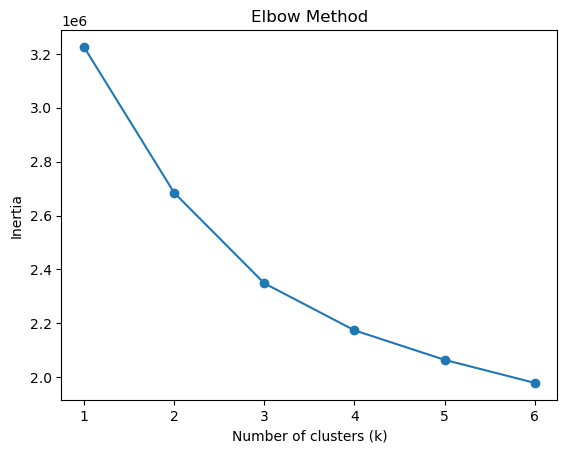

In [156]:
inertias = []
K = range(1, 7)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_final)
    inertias.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.plot(K, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [157]:
k_opt = 3

kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
kmeans_final.fit(x_final)

df_cluster["cluster"] = kmeans_final.labels_


In [158]:
X_sample = x_final.sample(n=9000, random_state=42)
labels_sample = kmeans_final.predict(X_sample)
sil = silhouette_score(X_sample, labels_sample)
print("Silhouette k=3:", sil)

Silhouette k=3: 0.1628301305669128


## PCA y visualización

In [159]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(x_final)

df_cluster["pca1"] = X_pca[:, 0]
df_cluster["pca2"] = X_pca[:, 1]


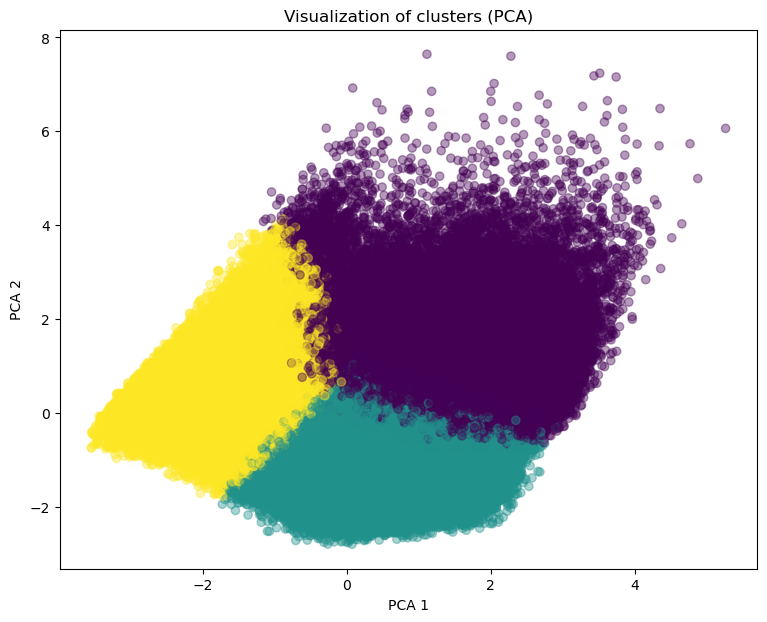

In [160]:
plt.figure(figsize=(9,7))
plt.scatter(df_cluster["pca1"], df_cluster["pca2"], 
            c=df_cluster["cluster"], cmap='viridis', alpha=0.4)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualization of clusters (PCA)")
plt.show()


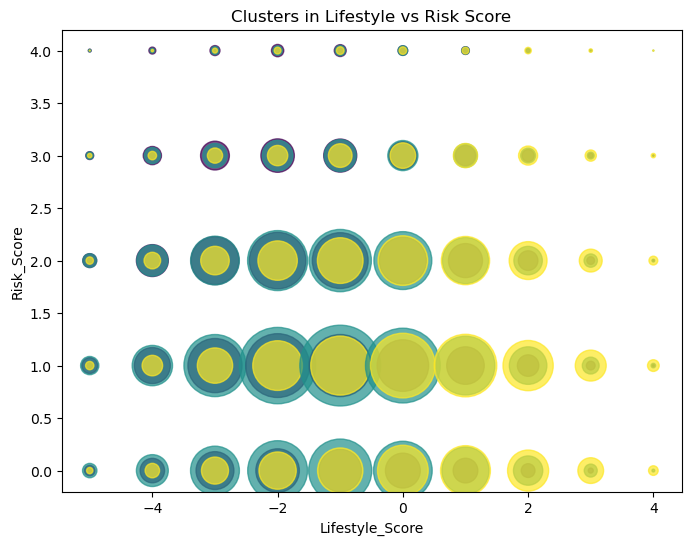

In [161]:
g = (
    df_cluster
    .groupby(["Lifestyle_Score", "Risk_Score", "cluster"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(8,6))
plt.scatter(
    g["Lifestyle_Score"],
    g["Risk_Score"],
    s=g["count"] / 5,         
    c=g["cluster"],
    cmap='viridis',
    alpha=0.7
)
plt.xlabel("Lifestyle_Score")
plt.ylabel("Risk_Score")
plt.title("Clusters in Lifestyle vs Risk Score")
plt.show()




In [162]:
df_cluster.groupby("cluster")[["Lifestyle_Score","Risk_Score"]].mean()


,Lifestyle_Score,Risk_Score
cluster,,
0,-1.439387,1.390873
1,-1.062972,1.147702
2,-0.095769,1.144223


## Statistics

In [163]:
df_cluster["cluster"].value_counts()


cluster
1    179794
2    120029
0    113945
Name: count, dtype: int64

In [164]:
df_cluster.groupby("cluster")[numeric_cols].mean().round(2)


,Age,Income_log,Lifestyle_Score,Risk_Score,Number of Children
cluster,,,,,
0,60.05,9.17,-1.44,1.39,1.53
1,54.71,11.04,-1.06,1.15,1.93
2,29.96,10.64,-0.10,1.14,0.14


In [165]:
df_cluster.groupby("cluster")[numeric_cols].agg(["mean", "std"]).round(2)


Age        Income_log       Lifestyle_Score       Risk_Score        \
          mean    std       mean   std            mean   std       mean   std   
cluster                                                                         
0        60.05  13.84       9.17  1.04           -1.44  1.56       1.39  0.95   
1        54.71  14.77      11.04  0.55           -1.06  1.64       1.15  0.90   
2        29.96  10.05      10.64  0.77           -0.10  1.73       1.14  0.90   

        Number of Children        
                      mean   std  
cluster                           
0                     1.53  1.15  
1                     1.93  1.12  
2                     0.14  0.41

In [166]:
cats_to_check = [
    "Income_level",      
    "Age_group",         
    "Marital Status",
    "Employment Status",
    "Education Level"
]

for col in cats_to_check:
    print(f"\nDistribution of {col} by cluster:")
    print(
        df_cluster
        .groupby("cluster")[col]
        .value_counts(normalize=True)
        .unstack()
        .round(2)
    )



Distribution of Income_level by cluster:
Income_level  High   Low  Middle
cluster                         
0              NaN  0.96    0.04
1             0.55  0.02    0.44
2             0.35  0.20    0.44

Distribution of Age_group by cluster:
Age_group  Child  Teen  Young Adult  Adult  Middle Age  Senior
cluster                                                       
0            0.0  0.00         0.06   0.19        0.34    0.41
1            0.0  0.00         0.11   0.31        0.30    0.29
2            0.0  0.11         0.65   0.18        0.06    0.00

Distribution of Marital Status by cluster:
Marital Status  Divorced  Married  Single  Widowed
cluster                                           
0                   0.08     0.64    0.01     0.27
1                   0.09     0.71     NaN     0.20
2                   0.06     0.33    0.59     0.02

Distribution of Employment Status by cluster:
Employment Status  Employed  Unemployed
cluster                                
0            

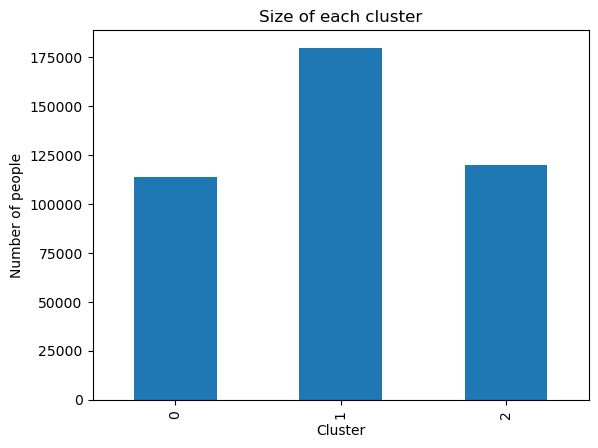

In [167]:
df_cluster["cluster"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Number of people")
plt.title("Size of each cluster")
plt.show()


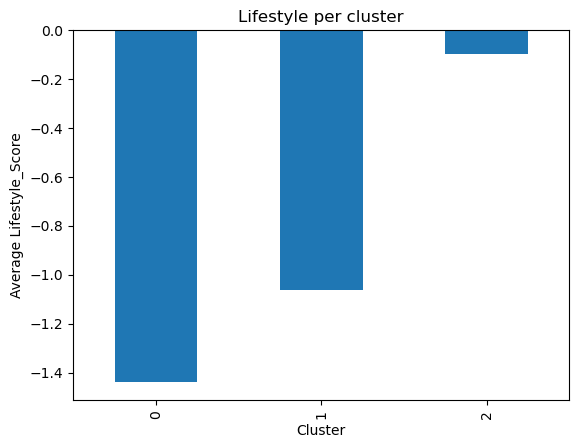

In [168]:
df_cluster.groupby("cluster")["Lifestyle_Score"].mean().plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Average Lifestyle_Score")
plt.title("Lifestyle per cluster")
plt.show()


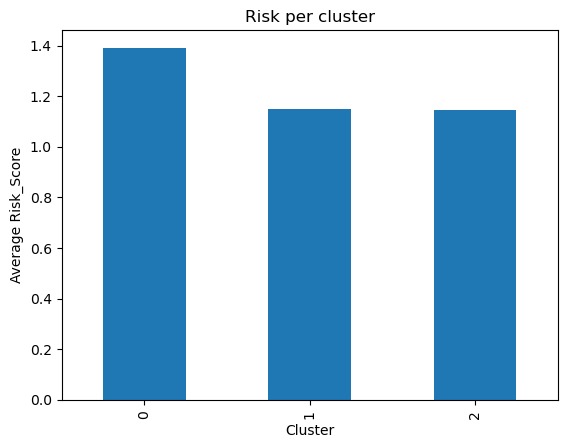

In [169]:
df_cluster.groupby("cluster")["Risk_Score"].mean().plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Average Risk_Score")
plt.title("Risk per cluster")
plt.show()


## Kmeans for each age group

In [170]:
bins = [0, 29, 59, 100]
labels = ["Young", "Adult", "Senior"]

df["Age_3groups"] = pd.cut(df["Age"], bins=bins, labels=labels)
print("Observations by age group:")
print(df["Age_3groups"].value_counts())

Observations by age group:
Age_3groups
Adult     197544
Senior    137609
Young      78615
Name: count, dtype: int64



=== Clustering y PCA para grupo de edad: Young ===
Observations in Young: 78615
Silhouette Young (k=3): 0.184


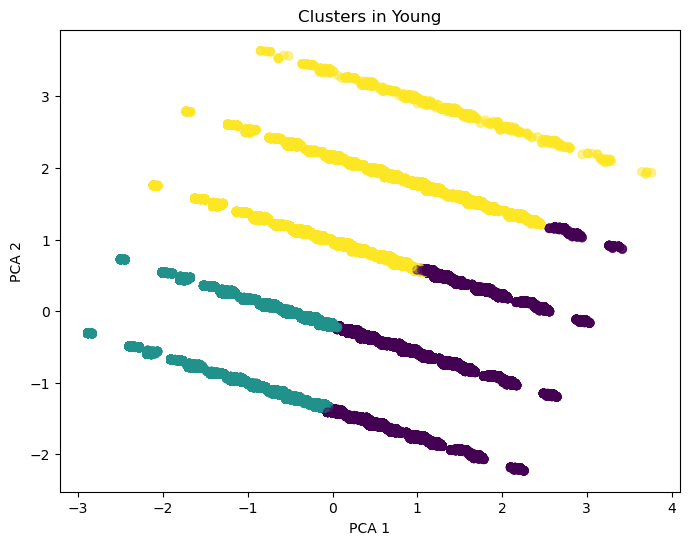


=== Clustering y PCA para grupo de edad: Adult ===
Observations in Adult: 197544
Silhouette Adult (k=3): 0.169


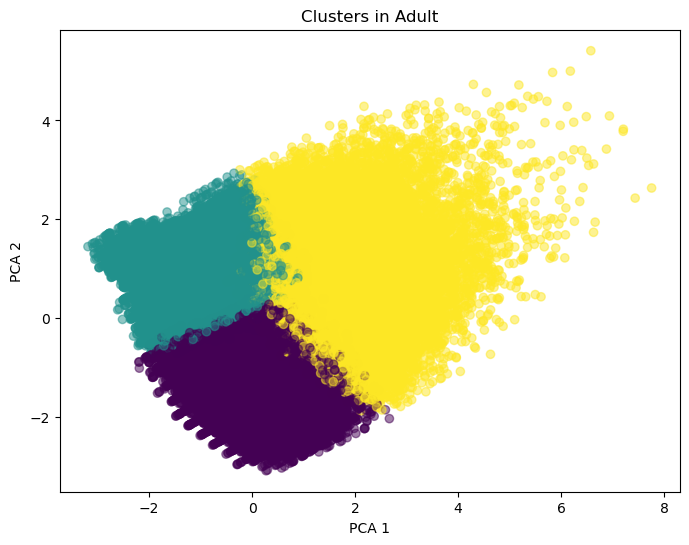


=== Clustering y PCA para grupo de edad: Senior ===
Observations in Senior: 137609
Silhouette Senior (k=3): 0.170


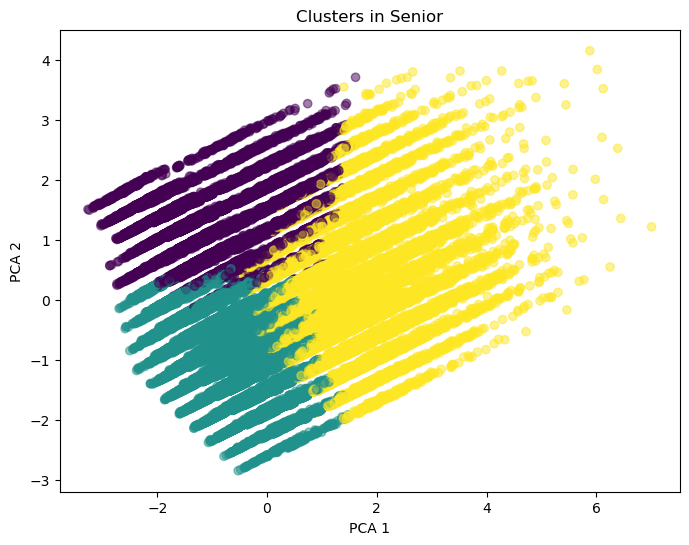

In [171]:

df["cluster_within_age"] = pd.NA

for grupo in ["Young", "Adult", "Senior"]:
    print(f"\n=== Clustering y PCA para grupo de edad: {grupo} ===")
    
    mask = df["Age_3groups"] == grupo
    df_sub = df[mask].copy()
    n_obs = df_sub.shape[0]
    print(f"Observations in {grupo}: {n_obs}")

    # features per group
    if grupo == "Young":
        numeric_cols = ["Lifestyle_Score", "Risk_Score"]
        categorical_cols = [
            "Education Level",
            "Smoking Status",
            "Alcohol Consumption",
            "Physical Activity Level"
        ]
        k_value = 3
    else:
        numeric_cols = ["Income_log", "Lifestyle_Score", "Risk_Score", "Number of Children"]
        categorical_cols = [
            "Marital Status",
            "Employment Status",
            "Education Level",
            "Income_level",
            "Has_children"
        ]
        k_value = 3

    # standardize and dummify
    X_num = df_sub[numeric_cols]
    X_cat = df_sub[categorical_cols]

    scaler = StandardScaler()
    X_num_scaled = pd.DataFrame(
        scaler.fit_transform(X_num),
        columns=numeric_cols,
        index=df_sub.index
    )

    X_cat_dummies = pd.get_dummies(X_cat, drop_first=True)

    X_final_sub = pd.concat([X_num_scaled, X_cat_dummies], axis=1)

    # KMEANS
    kmeans = KMeans(n_clusters=k_value, random_state=42, n_init=10)
    labels_sub = kmeans.fit_predict(X_final_sub)

    df_sub["cluster_within_age"] = labels_sub
    df.loc[mask, "cluster_within_age"] = labels_sub

    # SILHOUETTE SCORE
    n = X_final_sub.shape[0]
    sample_size = min(10000, n)
    if n > sample_size:
        idx = np.random.choice(n, sample_size, replace=False)
        X_sample = X_final_sub.iloc[idx, :]
        labels_sample = labels_sub[idx]
        sil = silhouette_score(X_sample, labels_sample)
    else:
        sil = silhouette_score(X_final_sub, labels_sub)
    print(f"Silhouette {grupo} (k={k_value}): {sil:.3f}")

    # PCA
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_final_sub)

    df_sub["pca1"] = X_pca[:, 0]
    df_sub["pca2"] = X_pca[:, 1]

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(
        df_sub["pca1"],
        df_sub["pca2"],
        c=df_sub["cluster_within_age"].astype(int),
        cmap="viridis",
        alpha=0.5
    )
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title(f"Clusters in {grupo}")
    plt.show()


In [172]:
# Count per age group and cluster
print(df.groupby("Age_3groups")["cluster_within_age"].value_counts())


Age_3groups  cluster_within_age
Young        1                     31716
             0                     26101
             2                     20798
Adult        0                     83128
             1                     64813
             2                     49603
Senior       1                     55029
             2                     46917
             0                     35663
Name: count, dtype: int64


C:\Users\roy_l\AppData\Local\Temp\ipykernel_25592\1257488430.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Age_3groups")["cluster_within_age"].value_counts())


In [173]:
# Statistis of numeric variables
for grupo in ["Young", "Adult", "Senior"]:
    print("\n-------------------------------------------")
    print(f"\n Numeric means for {grupo} ")
    
    if grupo == "Young":
        num_cols = ["Lifestyle_Score", "Risk_Score"]
    else:
        num_cols = ["Income_log", "Lifestyle_Score", "Risk_Score", "Number of Children"]
    
    print(
        df[df["Age_3groups"] == grupo]
          .groupby("cluster_within_age")[num_cols]
          .mean()
          .round(2)
    )



-------------------------------------------

 Numeric means for Young 
                    Lifestyle_Score  Risk_Score
cluster_within_age                             
0                             -2.13        0.98
1                              0.97        0.59
2                              0.27        2.31

-------------------------------------------

 Numeric means for Adult 
                    Income_log  Lifestyle_Score  Risk_Score  \
cluster_within_age                                            
0                        11.03            -1.31        1.18   
1                        11.00             0.00        1.06   
2                         9.15            -1.24        1.36   

                    Number of Children  
cluster_within_age                      
0                                 2.50  
1                                 0.36  
2                                 1.61  

-------------------------------------------

 Numeric means for Senior 
                    In

In [174]:
# Statistis of categorical variables
cat_cols_young  = ["Education Level", "Smoking Status", "Alcohol Consumption", "Physical Activity Level"]
cat_cols_adult  = ["Marital Status", "Employment Status", "Income_level", "Has_children"]

for grupo in ["Young", "Adult", "Senior"]:
    print("\n-------------------------------------------")
    print(f"\n Categorics for {grupo}")
    
    if grupo == "Young":
        cat_cols = cat_cols_young
    else:
        cat_cols = cat_cols_adult
    
    df_g = df[df["Age_3groups"] == grupo]
    
    for col in cat_cols:
        print(f"\n{col}:")
        print(
            df_g
              .groupby("cluster_within_age")[col]
              .value_counts(normalize=True)
              .unstack()
              .round(2)
        )



-------------------------------------------

 Categorics for Young

Education Level:
Education Level     Associate Degree  Bachelor's Degree  High School  \
cluster_within_age                                                     
0                               0.18               0.27         0.48   
1                               0.16               0.33         0.42   
2                               0.17               0.29         0.46   

Education Level     Master's Degree  
cluster_within_age                   
0                              0.08  
1                              0.09  
2                              0.08  

Smoking Status:
Smoking Status      Current  Former  Non-smoker
cluster_within_age                             
0                      0.50    0.22        0.28
1                      0.15    0.19        0.67
2                      0.29    0.18        0.53

Alcohol Consumption:
Alcohol Consumption  High   Low  Moderate
cluster_within_age                       


## Analysis cluster 2 young people

In [175]:
group = "Young"
cluster_target = 2

df_g = df[(df["Age_3groups"] == group) & (df["cluster_within_age"] == cluster_target)]

risk_variables = [
    'History of Mental Illness',
    'History of Substance Abuse',
    'Family History of Depression',
    'Chronic Medical Conditions'
]

print("Frequencies of Yes in risk variables:")
for var in risk_variables:
    pct_yes = (df_g[var] == "Yes").mean() * 100
    print(f"{var}: {pct_yes:.2f}% Yes")


Frequencies of Yes in risk variables:
History of Mental Illness: 59.35% Yes
History of Substance Abuse: 63.35% Yes
Family History of Depression: 42.86% Yes
Chronic Medical Conditions: 65.29% Yes


In [176]:
# Descriptive statistics
cols_num = ["Lifestyle_Score", "Risk_Score", "Income_log", "Number of Children"]
df_g[cols_num].describe().round(2)


,Lifestyle_Score,Risk_Score,Income_log,Number of Children
count,20798.00,20798.00,20798.00,20798.00
mean,0.27,2.31,10.40,0.23
std,1.39,0.51,0.95,0.58
min,-5.00,2.00,1.16,0.00
25%,-1.00,2.00,10.09,0.00
50%,0.00,2.00,10.50,0.00
75%,1.00,3.00,11.03,0.00
max,4.00,4.00,11.96,2.00


In [177]:
# Descriptive statistics of risk score
df_g["Risk_Score"].value_counts().sort_index()


Risk_Score
2    14922
3     5338
4      538
Name: count, dtype: int64

In [178]:
# Combination table 
comb_counts = (
    df_g[risk_variables]
      .apply(lambda row: "_".join(row.values.astype(str)), axis=1)
      .value_counts()
      .head(10)
)
comb_counts


No_Yes_No_Yes     3660
Yes_No_No_Yes     3173
Yes_Yes_No_No     2943
Yes_Yes_No_Yes    2109
No_No_Yes_Yes     1861
No_Yes_Yes_No     1740
Yes_No_Yes_No     1545
No_Yes_Yes_Yes    1194
Yes_No_Yes_Yes    1043
Yes_Yes_Yes_No     992
Name: count, dtype: int64

In [179]:
social_vars = [
    "Income_level",
    "Employment Status",
    "Education Level",
    "Marital Status"
]

for col in social_vars:
    print(f"\n{col} in Young – cluster {cluster_target}:")
    print(
        df_g[col]
          .value_counts(normalize=True)
          .mul(100)
          .round(1)
          .astype(str) + "%"
    )



Income_level in Young – cluster 2:
Income_level
Middle    44.8%
Low       28.2%
High      27.0%
Name: proportion, dtype: object

Employment Status in Young – cluster 2:
Employment Status
Employed      72.3%
Unemployed    27.7%
Name: proportion, dtype: object

Education Level in Young – cluster 2:
Education Level
High School          46.1%
Bachelor's Degree    28.6%
Associate Degree     17.0%
Master's Degree       8.3%
Name: proportion, dtype: object

Marital Status in Young – cluster 2:
Marital Status
Single     75.7%
Married    24.3%
Name: proportion, dtype: object
